In [14]:
# !pip install -q Kaggle

### Download Dataset

In [15]:
# from google.colab import files
# uploaded=files.upload()

In [16]:
# !mkdir -p ~/.kaggle               # membuat folder .kaggle di root
# !mv kaggle.json ~/.kaggle         # memindahkan file kaggle.json ke folder ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json  # merubah permission file kaggle.json

In [17]:
# !kaggle datasets download -d kamaruladha/mental-disorders-identification-reddit-nlp

In [18]:
# !unzip mental-disorders-identification-reddit-nlp.zip

### Read Kaggle Dataset

In [19]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/dataset/dataset_undersampled.csv')

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

# Text Classification Transformer Models

In [21]:
print(dataset.shape) # 701787 data, 5 kolom

(152190, 5)


In [22]:
dataset.isnull().sum() # Count NaN

title              9
selftext       13460
created_utc        0
over_18            0
subreddit          0
dtype: int64

In [23]:
dataset = dataset.dropna(how='any')   # Drop NaN

In [24]:
dataset['subreddit'].value_counts()   # Count each values of subreddit' and visualize them

depression       25318
BPD              24485
Anxiety          24377
bipolar          23142
mentalillness    21119
schizophrenia    20280
Name: subreddit, dtype: int64

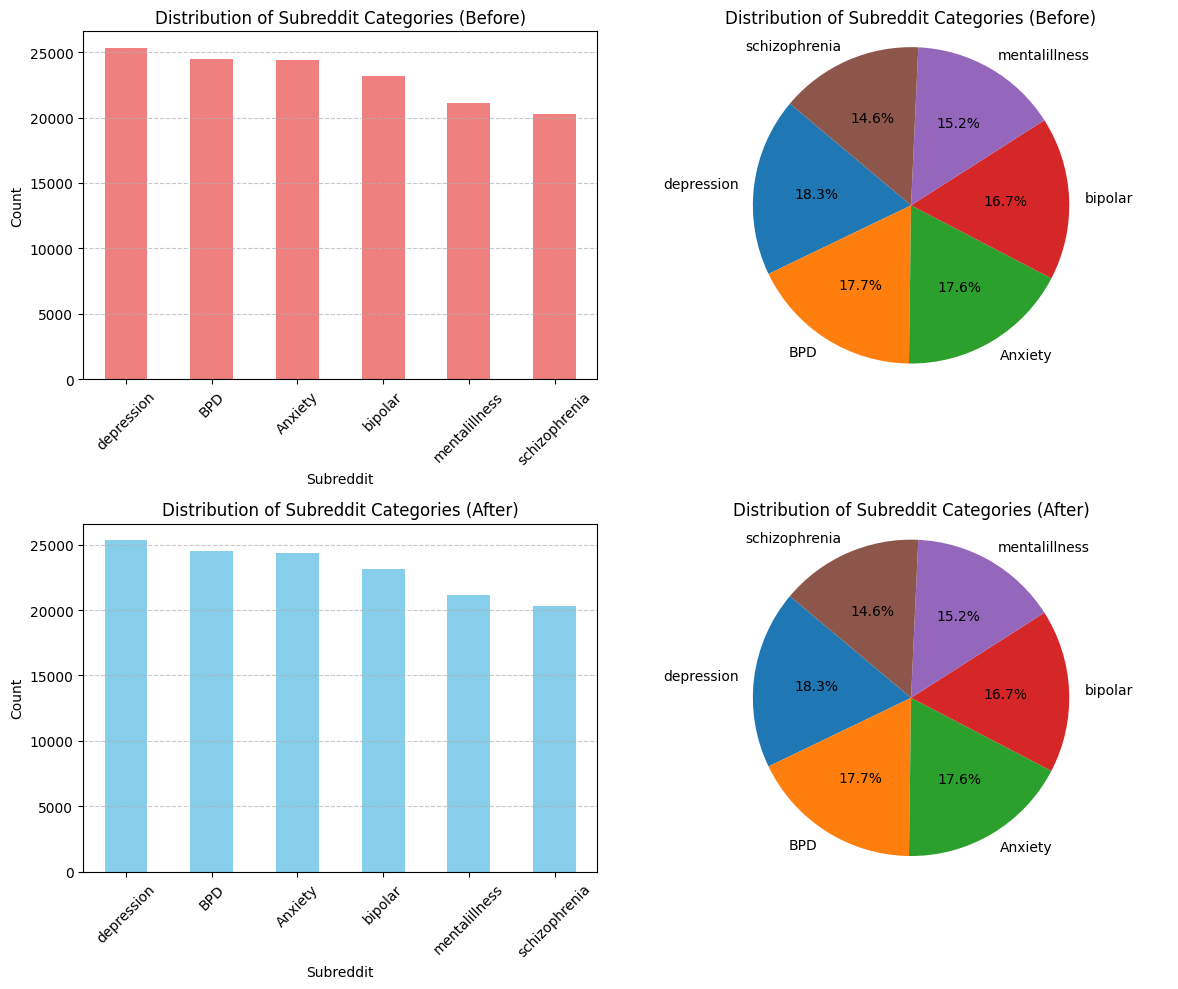

In [25]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing kategori subreddit sebelum undersampling
subreddit_counts_before = dataset['subreddit'].value_counts()

# Hitung jumlah masing-masing kategori subreddit setelah undersampling
subreddit_counts_after = dataset['subreddit'].value_counts()

# Plot diagram batang untuk sebelum undersampling
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
subreddit_counts_before.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Subreddit Categories (Before)')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot diagram lingkaran untuk sebelum undersampling
plt.subplot(2, 2, 2)
plt.pie(subreddit_counts_before, labels=subreddit_counts_before.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subreddit Categories (Before)')
plt.axis('equal')

# Plot diagram batang untuk setelah undersampling
plt.subplot(2, 2, 3)
subreddit_counts_after.plot(kind='bar', color='skyblue')
plt.title('Distribution of Subreddit Categories (After)')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot diagram lingkaran untuk setelah undersampling
plt.subplot(2, 2, 4)
plt.pie(subreddit_counts_after, labels=subreddit_counts_after.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subreddit Categories (After)')
plt.axis('equal')

plt.tight_layout()
plt.show()


### Subset the Dataset

In [26]:
# dataset = dataset['title','selftext','subreddit']

# subset dataset 5% dari data asli : 35.089
# BPD : 12.281
# Bipolar : 8.772
# Deppression : 8.070
# Anxiety : 2.456
# Mental Illness : 2.456
# scizophrenia : 1.052

dataset_subset_BPD = dataset.loc[0:12280]
dataset_subset_Anxiety = dataset.loc[233118:235574]
dataset_subset_Deppression = dataset.loc[400150:408220]
dataset_subset_Bipolar = dataset.loc[556857:565628]
dataset_subset_Mental_ill = dataset.loc[699330:701786]

dataset_subset = pd.concat([dataset_subset_BPD,dataset_subset_Anxiety,dataset_subset_Deppression,dataset_subset_Bipolar,dataset_subset_Mental_ill])

In [27]:
print(dataset_subset.shape)

(11781, 5)


In [28]:
dataset_subset['subreddit'].value_counts()

Anxiety    11781
Name: subreddit, dtype: int64

## Data Preprocessing

### *'title' Preprocessing*

In [29]:
def convert_lowercase(text):
    text = text.lower()
    return text

dataset_subset['title'] = dataset_subset['title'].apply(convert_lowercase)

dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,anxiety about my immigration paperwork,I'm from the States originally but have been l...,1668036962,False,Anxiety
1,can you take vistaril and a ssri together? doe...,I’m currently a few days into my first SSRI. I...,1663384394,False,Anxiety
2,sometimes i fear i’ll die in my sleep,Like right now I’m trying to go to bed but my ...,1665368639,False,Anxiety
3,😔,I guess I admit I have health anxiety and I fe...,1631958359,False,Anxiety
4,i finally scheduled an interview!,I’ve gotten up the courage to apply for jobs t...,1657831383,False,Anxiety


In [30]:
import re

def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

dataset_subset['title'] = dataset_subset['title'].apply(remove_url)

# dataset.head(5)

In [31]:
import string

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

dataset_subset['title'] = dataset_subset['title'].apply(remove_punc)

dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,anxiety about my immigration paperwork,I'm from the States originally but have been l...,1668036962,False,Anxiety
1,can you take vistaril and a ssri together does...,I’m currently a few days into my first SSRI. I...,1663384394,False,Anxiety
2,sometimes i fear i’ll die in my sleep,Like right now I’m trying to go to bed but my ...,1665368639,False,Anxiety
3,😔,I guess I admit I have health anxiety and I fe...,1631958359,False,Anxiety
4,i finally scheduled an interview,I’ve gotten up the courage to apply for jobs t...,1657831383,False,Anxiety


In [34]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

dataset_subset['title'] = dataset_subset['title'].apply(remove_stopwords)

In [36]:
dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,anxiety immigration paperwork,I'm from the States originally but have been l...,1668036962,False,Anxiety
1,take vistaril ssri together vistaril night hel...,I’m currently a few days into my first SSRI. I...,1663384394,False,Anxiety
2,sometimes fear ’ die sleep,Like right now I’m trying to go to bed but my ...,1665368639,False,Anxiety
3,😔,I guess I admit I have health anxiety and I fe...,1631958359,False,Anxiety
4,finally scheduled interview,I’ve gotten up the courage to apply for jobs t...,1657831383,False,Anxiety


In [37]:
# import numpy as np

# dataset_subset['Total Title After Transformation'] = dataset_subset['title'].apply(lambda x: np.log(len(x.split())))

In [38]:
dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,anxiety immigration paperwork,I'm from the States originally but have been l...,1668036962,False,Anxiety
1,take vistaril ssri together vistaril night hel...,I’m currently a few days into my first SSRI. I...,1663384394,False,Anxiety
2,sometimes fear ’ die sleep,Like right now I’m trying to go to bed but my ...,1665368639,False,Anxiety
3,😔,I guess I admit I have health anxiety and I fe...,1631958359,False,Anxiety
4,finally scheduled interview,I’ve gotten up the courage to apply for jobs t...,1657831383,False,Anxiety


### *'selftext' preprocessing*

In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

In [40]:
def convert_lowercase(text):
    text = text.lower()
    return text

dataset_subset['selftext'] = dataset_subset['selftext'].apply(convert_lowercase)

In [41]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

dataset_subset['selftext'] = dataset_subset['selftext'].apply(remove_url)

In [42]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

dataset_subset['selftext'] = dataset_subset['selftext'].apply(remove_punc)

In [43]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

dataset_subset['selftext'] = dataset_subset['selftext'].apply(remove_stopwords)

In [44]:
from nltk.stem import PorterStemmer

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

dataset_subset['selftext'] = dataset_subset['selftext'].apply(perform_stemming)

In [45]:
dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,anxiety immigration paperwork,im state origin live canada awhil variou visa ...,1668036962,False,Anxiety
1,take vistaril ssri together vistaril night hel...,’ current day first ssri wonder vistaril taken...,1663384394,False,Anxiety
2,sometimes fear ’ die sleep,like right ’ tri go bed leg feel realli weird ...,1665368639,False,Anxiety
3,😔,guess admit health anxieti feel silli sad kind...,1631958359,False,Anxiety
4,finally scheduled interview,’ gotten courag appli job twice year ’ panick ...,1657831383,False,Anxiety


In [46]:
# dataset_subset.to_csv('dataset_prepocessing.csv')

In [47]:
# from google.colab import files
# files.download("dataset_prepocessing.csv")

## Percobaan 3

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import seaborn as sns
import tensorflow as tf
import transformers

In [49]:
dataset_subset.replace(to_replace='BPD', value=0, inplace=True)
dataset_subset.replace(to_replace='Anxiety', value=1, inplace=True)
dataset_subset.replace(to_replace='depression', value=2, inplace=True)
dataset_subset.replace(to_replace='mentalillness', value=3, inplace=True)
dataset_subset = dataset_subset[['selftext', 'subreddit']]
dataset_subset.head()

,selftext,subreddit
0,im state origin live canada awhil variou visa ...,1
1,’ current day first ssri wonder vistaril taken...,1
2,like right ’ tri go bed leg feel realli weird ...,1
3,guess admit health anxieti feel silli sad kind...,1
4,’ gotten courag appli job twice year ’ panick ...,1


In [50]:
raw_dataset_subset = dataset_subset.copy()

In [51]:
def text_preprocessing(text):
  text = text.lower() #lowercase
  text = re.sub(r'#.+','', text) #menghapus tag
  text = re.sub(r'https?://\S+','', text) #menghapus url
  text = re.sub(r'[-+]?[0-9]+','', text) #mennghapus angka
  text = re.sub(r'[^\w\s]','', text) #menghapus tanda baca
  text = text.strip()
  return text

In [52]:
dataset_subset['selftext'] = dataset_subset['selftext'].apply(text_preprocessing)
dataset_subset.head()

,selftext,subreddit
0,im state origin live canada awhil variou visa ...,1
1,current day first ssri wonder vistaril taken s...,1
2,like right tri go bed leg feel realli weird ...,1
3,guess admit health anxieti feel silli sad kind...,1
4,gotten courag appli job twice year panick ign...,1


In [53]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset_subset, test_size=0.2, random_state=0)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=0)
df_train.shape, df_test.shape, df_val.shape

((9424, 2), (1179, 2), (1178, 2))

In [54]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [55]:
vocabulary = bert_tokenizer.get_vocab()
print('panjang vocab: ', len(vocabulary))
print(vocabulary)

panjang vocab:  30522
{'[PAD]': 0, '[unused0]': 1, '[unused1]': 2, '[unused2]': 3, '[unused3]': 4, '[unused4]': 5, '[unused5]': 6, '[unused6]': 7, '[unused7]': 8, '[unused8]': 9, '[unused9]': 10, '[unused10]': 11, '[unused11]': 12, '[unused12]': 13, '[unused13]': 14, '[unused14]': 15, '[unused15]': 16, '[unused16]': 17, '[unused17]': 18, '[unused18]': 19, '[unused19]': 20, '[unused20]': 21, '[unused21]': 22, '[unused22]': 23, '[unused23]': 24, '[unused24]': 25, '[unused25]': 26, '[unused26]': 27, '[unused27]': 28, '[unused28]': 29, '[unused29]': 30, '[unused30]': 31, '[unused31]': 32, '[unused32]': 33, '[unused33]': 34, '[unused34]': 35, '[unused35]': 36, '[unused36]': 37, '[unused37]': 38, '[unused38]': 39, '[unused39]': 40, '[unused40]': 41, '[unused41]': 42, '[unused42]': 43, '[unused43]': 44, '[unused44]': 45, '[unused45]': 46, '[unused46]': 47, '[unused47]': 48, '[unused48]': 49, '[unused49]': 50, '[unused50]': 51, '[unused51]': 52, '[unused52]': 53, '[unused53]': 54, '[unused54]'

In [56]:
print('kalimat: ', raw_dataset_subset['selftext'][1])
print('Bert tokenizer: ', bert_tokenizer.tokenize(dataset_subset['selftext'][1]))

kalimat:  ’ current day first ssri wonder vistaril taken ssri dose also take bed
Bert tokenizer:  ['current', 'day', 'first', 'ssr', '##i', 'wonder', 'vista', '##ril', 'taken', 'ssr', '##i', 'dose', 'also', 'take', 'bed']


Token indices sequence length is longer than the specified maximum sequence length for this model (1034 > 512). Running this sequence through the model will result in indexing errors


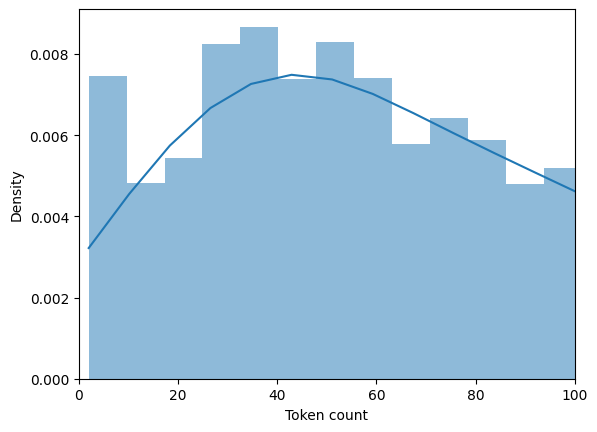

In [57]:
token_lens = []
for txt in dataset_subset['selftext']:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))
sns.histplot(token_lens, kde = True, stat='density', linewidth = 0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [58]:
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens = True,
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = 42,
      return_attention_mask = True,
      return_token_type_ids = True
  )

In [59]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [60]:
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [61]:
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [62]:
from transformers import TFBertForSequenceClassification

bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 5)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
bert_model.compile(
    optimizer = 'adam',  # Menggunakan nama string "adam"
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']  # Menggunakan nama string "accuracy" untuk metrik
)


In [64]:
callback_ES = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    min_delta=0.05,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [65]:
bert_history = bert_model.fit(train_encoded, epochs = 3,
                              batch_size = 32,
                              validation_data = val_encoded,
                              callbacks=[callback_ES])

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
295/295 [==============================] - 187s 347ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 9.5367e-07 - val_accuracy: 1.0000
Epoch 2/3
295/295 [==============================] - 90s 304ms/step - loss: 1.1106e-06 - accuracy: 1.0000 - val_loss: 9.5367e-07 - val_accuracy: 1.0000
Epoch 3/3
295/295 [==============================] - 90s 305ms/step - loss: 1.0360e-06 - accuracy: 1.0000 - val_loss: 9.5367e-07 - val_accuracy: 1.0000


In [66]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

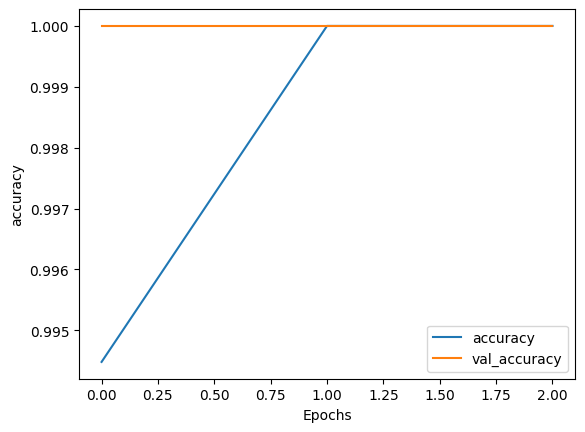

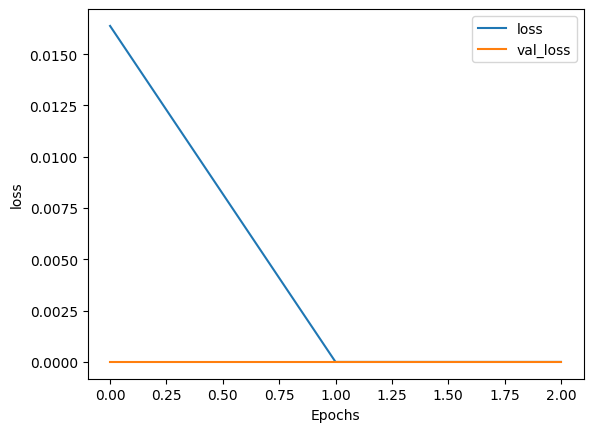

In [67]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [68]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(3):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.994482 	   0.016375 	   1.000000 	   0.000001
       2   1.000000 	   0.000001 	   1.000000 	   0.000001
       3   1.000000 	   0.000001 	   1.000000 	   0.000001


In [69]:
bert_model.save_weights('bert-model.h5')

In [70]:
score = bert_model.evaluate(test_encoded)
print("Test Accuracy: ", score[1])

37/37 [==============================] - 4s 102ms/step - loss: 9.5367e-07 - accuracy: 1.0000
Test Accuracy:  1.0


In [71]:
score

[9.536742027194123e-07, 1.0]

In [72]:
predicted_raw = bert_model.predict(test_encoded)

37/37 [==============================] - 12s 97ms/step


In [73]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['subreddit'])

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

1.0

In [75]:
confusion_matrix(y_true, y_pred)

array([[1179]])

In [76]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1179

    accuracy                           1.00      1179
   macro avg       1.00      1.00      1.00      1179
weighted avg       1.00      1.00      1.00      1179



In [77]:
bert_load_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 5)
bert_load_model.load_weights('bert-model.h5')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
print(dataset_subset['selftext'].iloc[26])

let prefac say ive drive half life fortun enough major issu recent thing trigger drive anxieti first bad accid week christma hometown take left car didnt see made attempt stop car complet destroy taken ambul miracul injuri driver complet fine need ambul car hit two inch closer seat would write right anxieti increas sinc fast forward week ago famili vehicl stop red light person behind us hydroplan rear saw light werent abl stop get assess damag either vehicl famili okay move along sound car hit us loud scari last week horribl tragedi hometown two young men fatal accid famili knew heartbreak think day drive hometown saw accid car look pretti bad heard  ambul call fatal seem caus chain reaction anxieti im horrifi drive cant avoid drive either rout big accid liter unavoid remind everytim drive still see shimmer glass car dont know guess dont know process therapist touch basic say first accid traumat other trigger trauma make sens somehow get im nightmar point


In [80]:
input_text = dataset_subset['selftext'].iloc[1]

input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation = True,
                                             padding = 'max_length',
                                             return_tensors = 'tf')

In [81]:
bert_predict = bert_load_model(input_text_tokenized)
bert_output = tf.nn.softmax(bert_predict[0], axis = -1)

In [82]:
mental_illness_label = ['BPD', 'Anxiety', 'depression', 'mentalillness']
label = tf.argmax(bert_output, axis = 1)
label = label.numpy()

In [83]:
print("Input text : ",input_text,'\n', "label : ", mental_illness_label[label[0]])

Input text :  current day first ssri wonder vistaril taken ssri dose also take bed 
 label :  Anxiety


In [84]:
import pickle

# Save the tokenizer
with open('/content/drive/MyDrive/dataset/bert_tokenizer1.pkl', 'wb') as f:
    pickle.dump(bert_tokenizer, f)

# Save the model weights
bert_model.save_weights('/content/drive/MyDrive/dataset/bert_model_weights1.h5')

# You can also save other necessary information like label mappings, etc., using pickle
